<a href="https://colab.research.google.com/github/edogriba/NAML-2024/blob/main/LAB02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LAB 02

## Randomized SVD

In [6]:
from matplotlib.image import imread
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['figure.figsize'] = [8, 8]

# write here the import path of the image
image_path = 'TarantulaNebula.jpg'

A = imread(image_path)

In [1]:
def randomized_SVD(A, k):
  P = np.random.randn(A.shape[1], k)
  Z = A @ P
  Q, _ = np.linalg.qr(Z)
  Y = Q.T @ A
  Uy, s, VT = np.linalg.svd(Y, full_matrices=False)
  U = Q @ Uy
  return U, s, VT

  # np.random.randn()
  # np.linalg.qr
  # np.linalg.svd

In [11]:
X = np.mean(A, axis=2)

Now let's define k = 100 and compute the randomized SVD of the picture used above

In [14]:
k = 100
U, s, VT = np.linalg.svd(X)
Ur, sr, VTr = randomized_SVD(X, k)

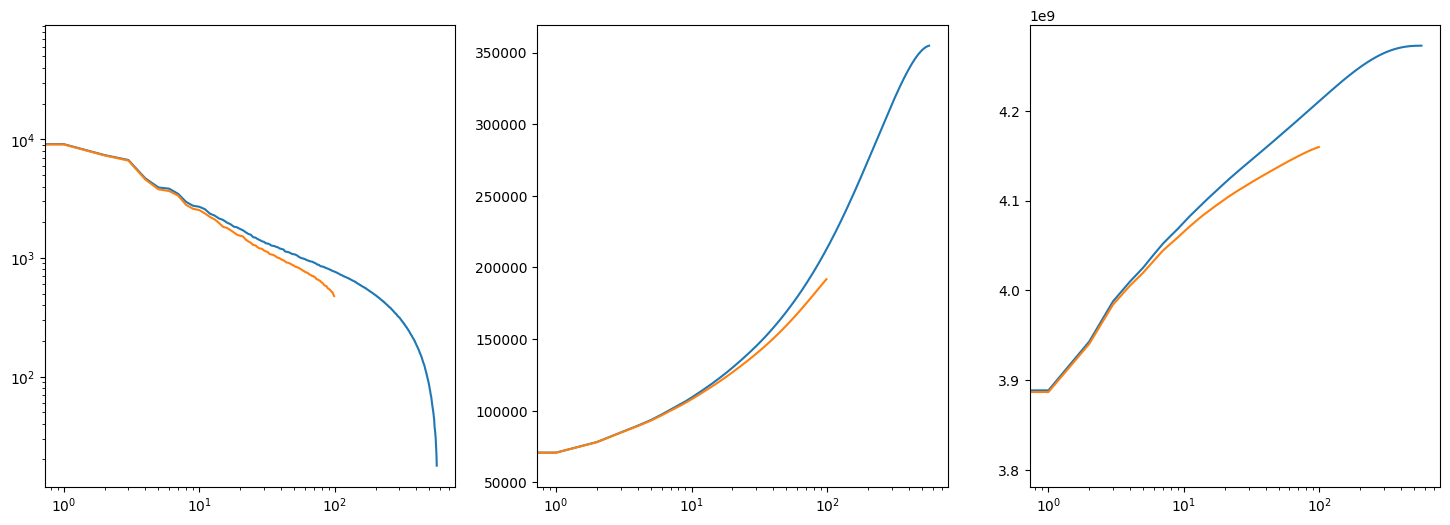

In [16]:
fig, axs = plt.subplots(1, 3, figsize=(18, 6))
axs[0].loglog(s)
axs[1].semilogx(np.cumsum(s))
axs[2].semilogx(np.cumsum(s**2))

axs[0].loglog(sr)
axs[1].semilogx(np.cumsum(sr))
axs[2].semilogx(np.cumsum(sr**2))

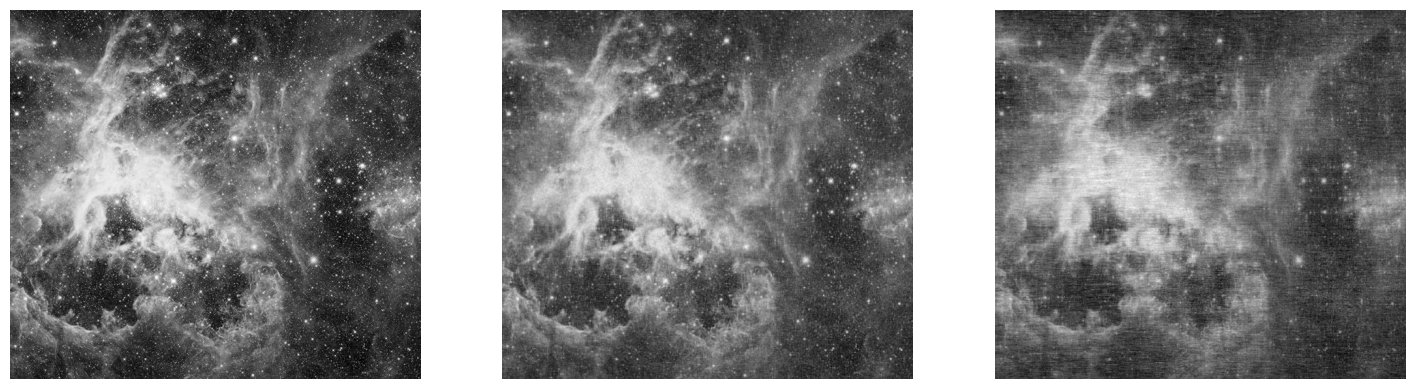

In [22]:
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

axs[0].imshow(X, cmap="gray")
axs[0].set_axis_off()

axs[1].imshow(U[:, :k]@np.diag(s[:k])@VT[:k, :], cmap="gray")
axs[1].set_axis_off()


axs[2].imshow(Ur@np.diag(sr)@VTr, cmap="gray")
axs[2].set_axis_off()


## Cancer diagnostic

> Real world dataset --> for each patient

We'd like to understand which combination of genes is more likely to correlate with cancer


In [24]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

ovariancancer_obs_path = 'ovariancancer_obs.csv'
ovariancancer_grp_path = 'ovariancancer_grp.csv'


A = np.genfromtxt(ovariancancer_obs_path, delimiter=',').transpose()
with open(ovariancancer_grp_path, "r") as fp:
  grp = np.array(fp.read().split("\n"))

grp = grp[grp != [''] ]


FileNotFoundError: ovariancancer_obs.csv not found.

In [ ]:
print(f"the number of patients is {A.shape[1]}")
print(f"the number of features is {A.shape[0]}")

the number of patients is 216
the number of features is 4000
